In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

# Data Analysis (Hints and Examples)


Once you've collected some data you'll want to visualize and analyze it. Save the data you've collected in a CSV file.

You can load the data here, as described in the [GettingStarted](GettingStarted.ipynb) notebook.

# Experiment 1: Ohm's Law

In this experiment you should have two voltages for every measurment. 

You can use the voltage drop across the top resistor ($R_1$) to estimate the current through the "unknown" resistor. Then you can model the voltage across the bottom resistor ($R_3$) as proportional to the current.

|Schematic|
|:-|
|![Fig. 2: PCB Schematic](imgs/schematic.png)|
|PCB Microcontroller Schematic|

So $V = I R$ treating $R$ as an "unknown" use `curve_fit` to find the slope.

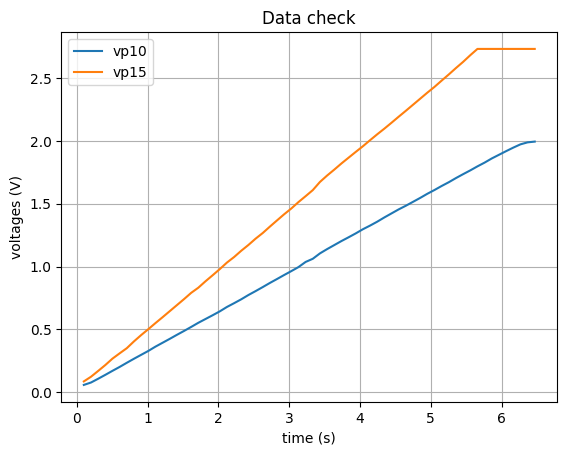

In [14]:
# Here's some example code with some example data to give you an idea how it might work.

df = pd.read_csv("ohmdata.csv") # assuming ohmdata as columns named 'vp15', etc.

plt.plot(df.time, df.vp10, label="vp10")
plt.plot(df.time, df.vp15, label="vp15")
plt.grid()
plt.title("Data check")
plt.xlabel("time (s)")
plt.ylabel("voltages (V)")
plt.legend()

In [16]:
# Note that because the ADC is limited, we're topping out. Let's take out the data after clipping.

tlimit = df.time < 5.5
R=1e3 # 1k ohm
vp10 = df.vp10[tlimit] # voltage on pin 10 within time limit
vp15 = df.vp15[tlimit] # voltage on pin 15 within time limit
I = (vp15-vp10)/R
V = vp10

R=1952.33+/-2.26 Ω


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

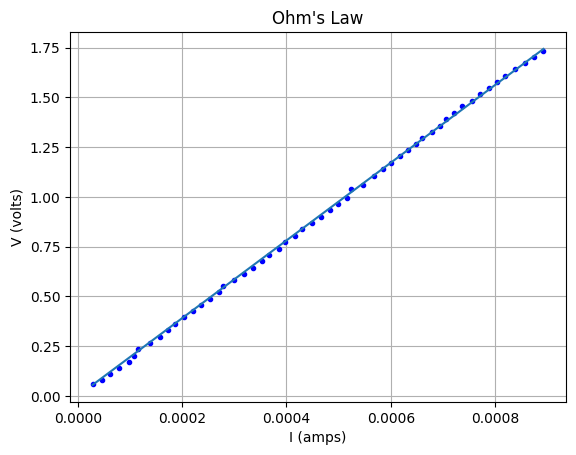

In [17]:

def fit_func(I, R):
    return I*R

par, cov = curve_fit(fit_func, I, V, sigma=0.001*np.ones(len(I)))

R = par[0]
dR = np.diag(np.sqrt(cov))[0]
print(f"R={R:0.2f}+/-{dR:0.2f} Ω")

plt.title("Ohm's Law")
plt.xlabel("I (amps)")
plt.ylabel("V (volts)")
plt.grid()
plt.plot(I,V,'b.',label='data')
plt.plot(I,fit_func(I,R),label='fit')
plt.legend

# Experiment 2: RC Time Constant

Now that you've got the hang of it, let's estimate the RC Time constant of the RC Circuit.

Save the data from that experiment, and apply the same idea here to find the RC time constant.

In [19]:
# Load your data here, and perform the analysis. Be sure to ask if you get stuck!


# Experiment 3: LED I-V curve

The last experiment. Use the same idea we used for Ohm's law: get the current from the drop across the 130 Ω resistor and get the voltage from pin-13 this time. Use the simplified Shockley model (leaving out the "-1") and find the parameters of the model.

Ask if you run into trouble! Enjoy.